## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [2]:
# student 1: Omer Zafrany 7420
# student 2: Elad Samuelov 2643
# student 3:
# student 4:
# (optional) student 5:
# (optional) student 6:

## Part 2 - Experiments
You could add as many code cells as needed

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB  

In [4]:
df_test = pd.read_csv('wine_test.csv')
df_train = pd.read_csv('wine_train.csv')

display(df_test.head())
display(df_train.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


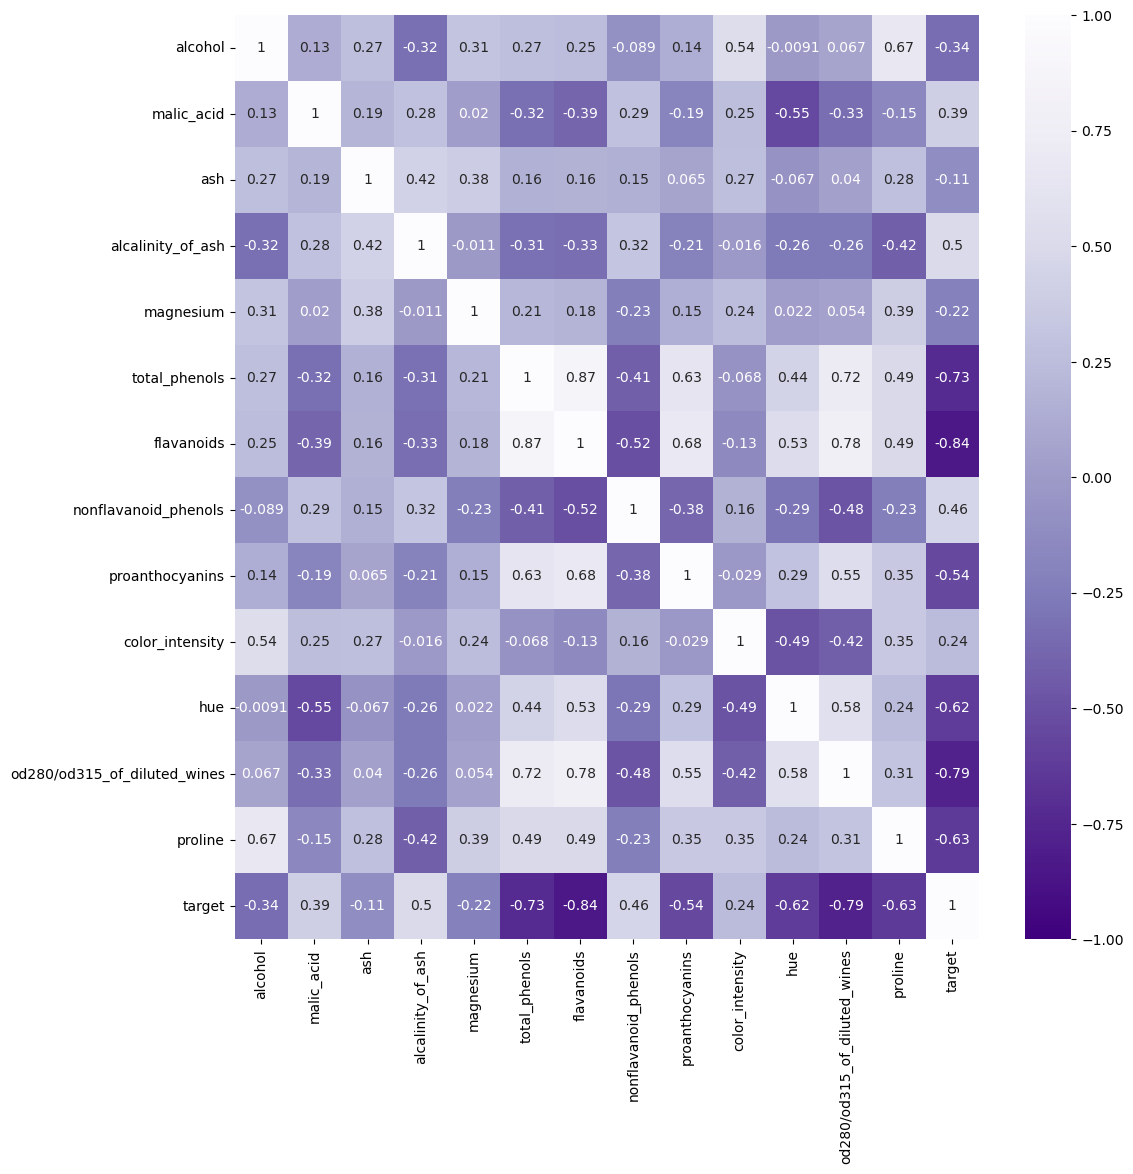

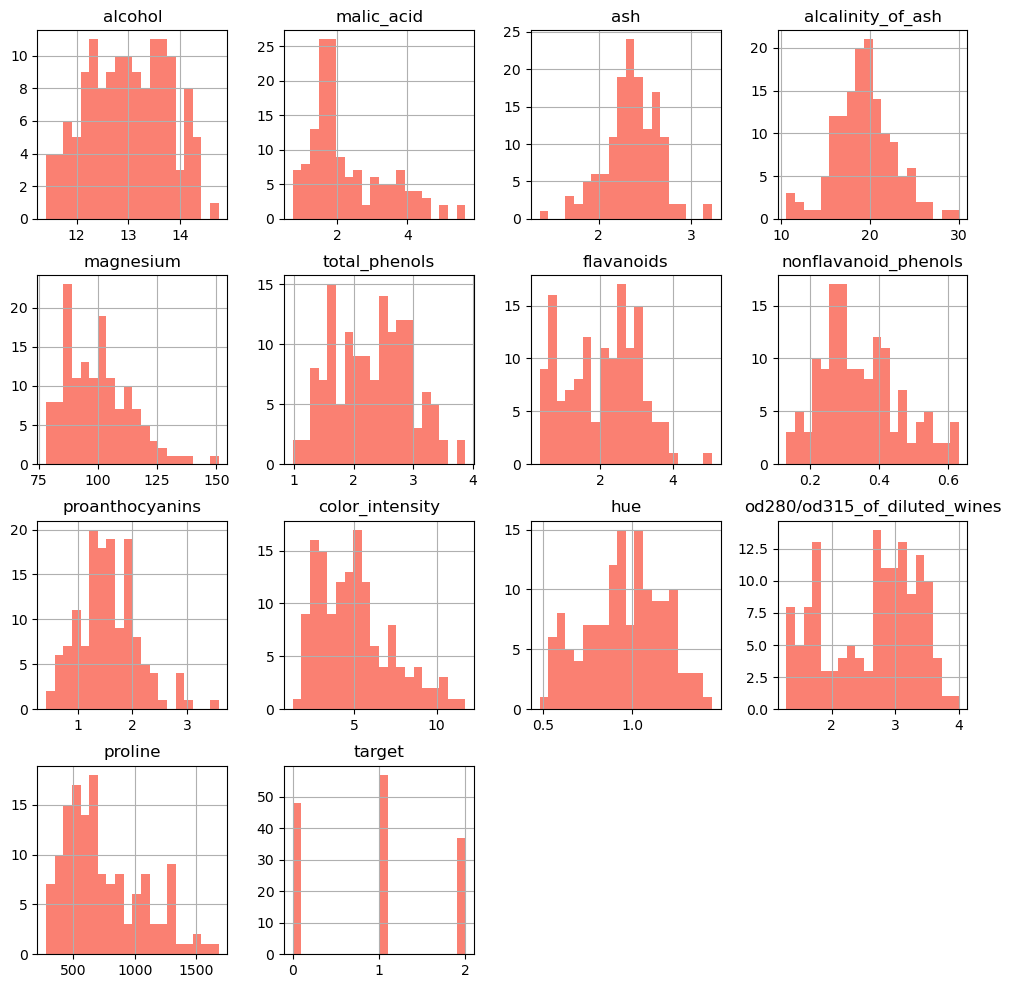

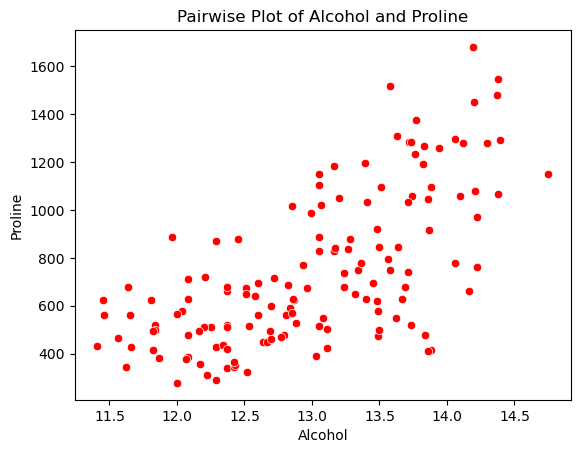

We can see a direct correlation between alcohol percentages and proline levels.


,index,count
0,1,57
1,0,48
2,2,37


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


In [14]:
#EDA

#all the features heatmap - relations among the features
corr_matrix = df_train.corr()
plt.figure(figsize=(12, 12))
sb.heatmap(corr_matrix, annot=True, annot_kws={"fontsize": 10}, vmin=-1, vmax=1, cmap='Purples_r')
plt.show()

#histogram for each feature - Standard bell shape in each feature
df_train.hist(bins=20, figsize=(12, 12),color='salmon')
plt.show()

x  = pd.read_csv("wine_train.csv")
selected_columns = x[['alcohol', 'proline']]
sns.scatterplot(x='alcohol', y='proline', data=selected_columns, color='red')
plt.title('Pairwise Plot of Alcohol and Proline')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.show()
print("We can see a direct correlation between alcohol percentages and proline levels.")


display(df_train['target'].value_counts().reset_index(name='count'))
#display target values of wine

display(df_train.describe())
#DataSet statistics

In [15]:
# Covariance Matrix
cov_matrix = df_train.cov()
#Correlation Matrix
corr_matrix = df_train.corr()

#Features engineering 

# Selecting th features with high correlation to the 'target' - Feature Selection
threshold = 0.7  
MVP_features = corr_matrix['target'][abs(corr_matrix['target']) > threshold].index
MVP_features = MVP_features.drop('target')
print(MVP_features)

# Select the features for the model
x = df_train[MVP_features]
y = df_train['target']

Index(['total_phenols', 'flavanoids', 'od280/od315_of_diluted_wines'], dtype='object')


In [16]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


# PCA - Dimentsion Reduction
pca = PCA(n_components=0.95)  
x_pca = pca.fit_transform(x_scaled)
print(x_pca.shape)

(142, 2)


In [49]:
#Training

# Shuffle The Data
df_train = shuffle(df_train, random_state=42)

# Redistribute Again
x = df_train.drop(columns=['target'])
y = df_train['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#KNN model (not scaled)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy Without scaling: {accuracy:.2f}")


#Desicion Tree model (not scaled)
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(x_train, y_train)
y_pred_tree = tree_model.predict(x_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: Without scaling {accuracy_tree:.2f}")

# KNN model (scaled)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
knn_model_scaled = KNeighborsClassifier(n_neighbors=3)
knn_model_scaled.fit(x_train_scaled, y_train)
y_pred_scaled = knn_model_scaled.predict(x_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"KNN Accuracy scaled: {accuracy_scaled:.2f}")

#Desicion Tree model (scaled) 
tree_model_scaled = DecisionTreeClassifier(max_depth=3)
tree_model_scaled.fit(x_train_scaled, y_train)
y_pred_tree_scaled = tree_model_scaled.predict(x_test_scaled)
accuracy_tree_scaled = accuracy_score(y_test, y_pred_tree_scaled)
print(f"Decision Tree Accuracy scaled: {accuracy_tree_scaled:.2f}")

KNN Accuracy Without scaling: 0.76
Decision Tree Accuracy: Without scaling 0.90
KNN Accuracy scaled: 0.97
Decision Tree Accuracy scaled: 0.93


C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [50]:
#Choosing optimal permutation for the 5-fold-cross-validation using the searchGrid method

# Defining the classifiers and their hyperparameters
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Artificial Neural Network': MLPClassifier(max_iter=10000),
    'Random Forest': RandomForestClassifier()
}

# Define hyperparameters for all classifier
param_grids = {
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    'Naive Bayes': {},  # Naive Bayes has no hyperparameters to tune
    'Artificial Neural Network': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'tanh'], 'solver': ['adam', 'sgd']},
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_features': [ 'sqrt', 'log2'], 'min_samples_split': [2, 10, 20]}
}

In [67]:
import warnings

# Defining scorer for the F1-macro
f1_macro_scorer = make_scorer(f1_score, average='macro')

BestEstimators = {}
for model_name, model in classifiers.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring=f1_macro_scorer)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)
        grid_search.fit(x_train, y_train)
    BestEstimators[model_name] = grid_search.best_estimator_
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation F1 score for {model_name}: {grid_search.best_score_}")



# Compile the results to the DataFrame for comparison
results = {
    'Model': [],
    'Best Params': [],
    'Best F1 Score': []
}
for model_name, estimator in BestEstimators.items():
    results['Model'].append(model_name)
    results['Best Params'].append(estimator.get_params())
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)
        results['Best F1 Score'].append(cross_val_score(estimator, x_train, y_train, cv=5, scoring=f1_macro_scorer).mean())

results_df = pd.DataFrame(results)
print("\nComparison of Results:")
display(results_df)

# Choosing the best model

# Identify the best model based on the highest F1 score
best_model_name = results_df.loc[results_df['Best F1 Score'].idxmax()]['Model']
best_model = BestEstimators[best_model_name]
print(f"\nBest Model: {best_model_name} with params: {results_df.loc[results_df['Best F1 Score'].idxmax()]['Best Params']}")


Best parameters for Decision Tree: {'max_depth': 30, 'min_samples_split': 2}
Best cross-validation F1 score for Decision Tree: 0.9223560552507921

Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best cross-validation F1 score for K-Nearest Neighbors: 0.7732929248254325

Best parameters for Naive Bayes: {}
Best cross-validation F1 score for Naive Bayes: 0.9589165220744167

Best parameters for Artificial Neural Network: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}
Best cross-validation F1 score for Artificial Neural Network: 0.9565482081271555

Best parameters for Random Forest: {'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10}
Best cross-validation F1 score for Random Forest: 0.9754565901934324

Comparison of Results:


,Model,Best Params,Best F1 Score
0,Decision Tree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.914022
1,K-Nearest Neighbors,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.773293
2,Naive Bayes,"{'priors': None, 'var_smoothing': 1e-09}",0.958917
3,Artificial Neural Network,"{'activation': 'tanh', 'alpha': 0.0001, 'batch...",0.930543
4,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.965148



Best Model: Random Forest with params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [68]:
# Train the model with best combination

def train_and_evaluate_best_model(x_train, y_train, x_test, y_test, best_model_name):

    if best_model_name not in classifiers:
        raise ValueError(f"Invalid model name: {best_model_name}")

    clf = classifiers[best_model_name]
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    results = {
        'accuracy': accuracy,
        'classification_report': classification_rep
    }
    return results

results = train_and_evaluate_best_model(x_train, y_train, x_test, y_test, best_model_name)

#Show results
print(f"Accuracy: {results['accuracy']:.4f}")
print(f"Best Model Name is : {best_model_name}")
print("Classification Report:")
print(results['classification_report'])

Accuracy: 0.9655
Best Model Name is : Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94         9
           2       0.89      1.00      0.94         8

    accuracy                           0.97        29
   macro avg       0.96      0.96      0.96        29
weighted avg       0.97      0.97      0.97        29



## Part 4 - Apply on test and show model performance estimation

In [69]:
# Model revision

#Apply the chosen engineered feature on the test DataSet to make predictions using the selected model.
if BestEstimators[best_model_name] == 'Yes':
    x_test_final = scaler.transform( x_test)
else:
    x_test_final =  x_test

# Prediction on the test DataSet
test_preds_final = best_model.predict(x_test_final)

# results on the test DataSet
accuracy_test_final = accuracy_score(y_test, test_preds_final)
report_test_final = classification_report(y_test, test_preds_final, target_names=['0', '1', '2'])

#Printing the model results on the test DataSet
print("Results over DataSet")
print(f"Final Accuracy {accuracy_test_final:.4f}")
print("Final Classification")
print(report_test_final)

Results over DataSet
Final Accuracy 1.0000
Final Classification
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

